# Auto matching

In [1]:
from skimage import measure

In [2]:
#Ethan Rublee, Vincent Rabaud, Kurt Konolige and Gary Bradski “ORB: An efficient alternative to SIFT and SURF” 
# http://www.vision.cs.chubu.ac.jp/CV-R/pdf/Rublee_iccv2011.pdf
from skimage import data, io, feature
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


In [3]:
import glob
from skimage import color
import numpy as np

In [4]:
img1 = rgb2gray(io.imread('https://www.dagospia.com/img/foto/09-2010/70328.jpg'))
img2 = rgb2gray(io.imread('http://www.talentieventi.it/wp-content/uploads/2018/03/IMG_6053-770x578.jpg'))
img3 = rgb2gray(io.imread('https://conversazioniartisticheblogweb.files.wordpress.com/2017/01/caffecc80-greco-guttuso-ok-1023x4801.jpg?w=656&h=300&crop=1'))

In [5]:
descriptor_extractor = ORB(n_keypoints=300)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

md = 0.3
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True, max_distance = md)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True, max_distance = md)
print(len(matches12))
print(len(matches13))

52
12


/home/leonardo/anaconda3/lib/python3.6/site-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


52
12


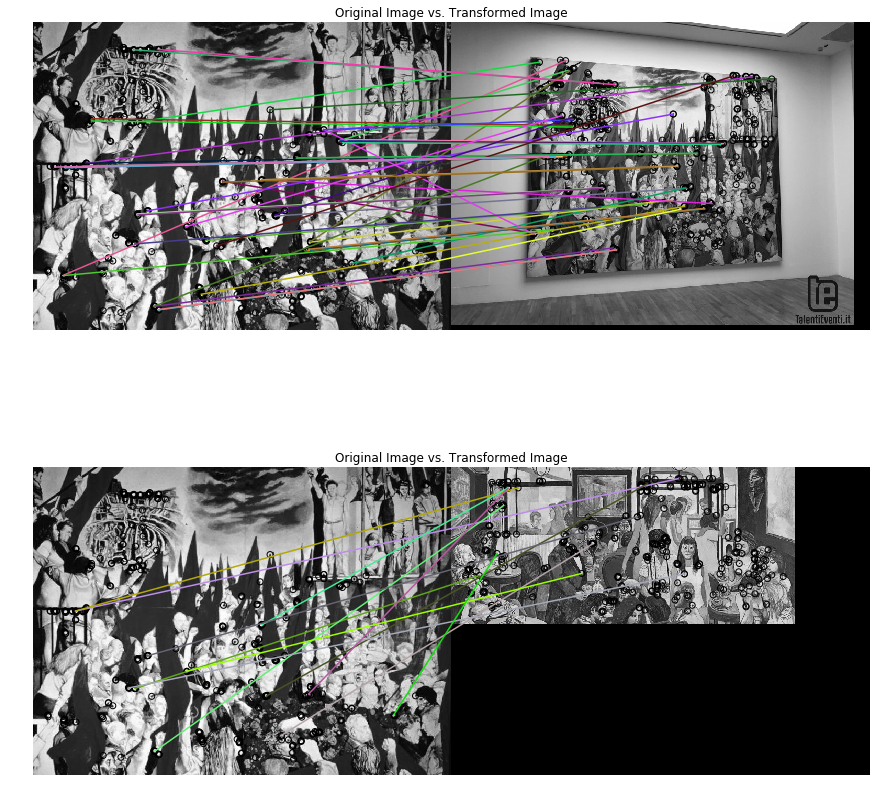

In [6]:

fig, ax = plt.subplots(figsize=(15,15),nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")
print(len(matches12))

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")
print(len(matches13))


plt.show()